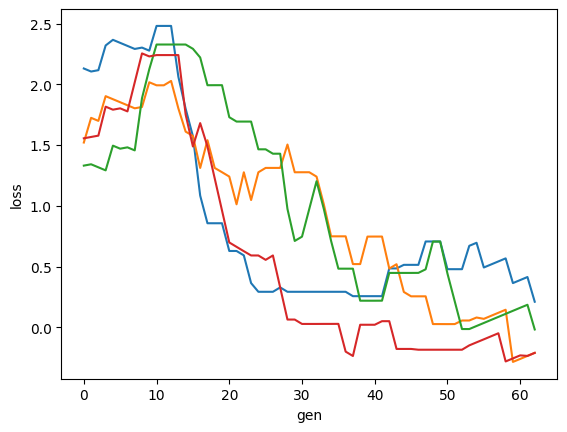

In [7]:

import matplotlib.pyplot as plt
from collections import defaultdict
import csv 
import numpy as np

fitness_path = f"/home/magraz/rovers/pyrover_domain/tests/fitness_critics_loss.csv"
n_fit_crits = 4
dd=defaultdict(list)

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size) 
    return np.convolve(interval, window, 'same')

with open(fitness_path,'r') as csvfile: 
    for line in csv.DictReader(csvfile):
        for key, value in line.items():
            if key != '' and value != '' and value != None and not isinstance(value, list):
                dd[key].append(float(value))

fig=plt.figure()
ax=fig.add_subplot(111)


for i in range(n_fit_crits):
    loss = movingaverage(dd[f"loss_{i}"], 20)
    ax.plot(dd["generation"], loss)

ax.set_xlabel('gen') 
ax.set_ylabel('loss') 

plt.show() 